In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from scripts.Function import Correlations

In [3]:
df = pd.read_csv('publications_clean.csv')
df.head(3)

,index,id,car_year,brand,brand_cod,model,model_cod,version,engine,engine_power,...,passenger_capacity,transmission,transmission_cod,usd_price,is_car_shop,seller_country,seller_state,seller_city,Latitude,longitude
0,0,MLA1767503710,2008,Volkswagen,7,Gol,27,1.9 Sd Power 701,1.9,64.0,...,5.0,Manual,2,5200.0,0,Argentina,Buenos Aires,Avellaneda,-34.664839,-58.362806
1,1,MLA1776550792,2012,Volkswagen,7,Gol,27,1.4 Power Ps+ac 83cv,1.4,83.0,...,5.0,Manual,2,6250.0,0,Argentina,Capital Federal,Capital Federal,-34.603718,-58.381530
2,2,MLA1776084372,2010,Volkswagen,7,Gol,27,1.6 I Power 701,1.6,92.0,...,5.0,Manual,2,6000.0,0,Argentina,Buenos Aires,San Isidro,-34.473979,-58.526487


## EDA

### Analisis de correlaciones

#### Correlacion de Pearson

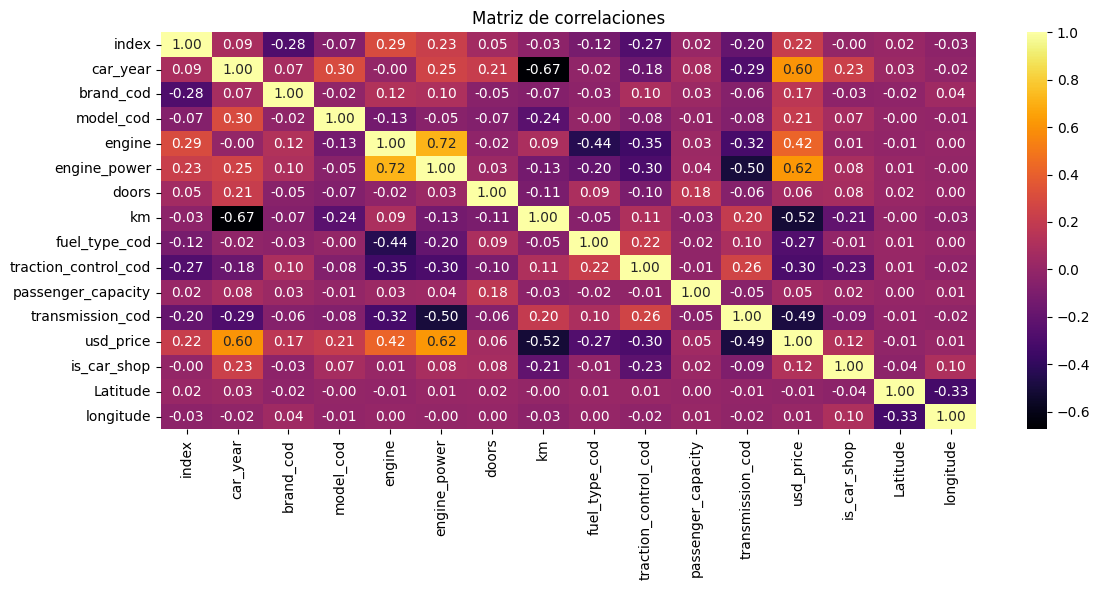

In [4]:
#MATRIZ DE CORRELACION DE PEARSON
plt.figure(figsize=(12,6))
matrix = df.corr(numeric_only=True)
sns.heatmap(matrix, fmt='.2f', annot=True, cmap='inferno')
plt.title('Matriz de correlaciones')
plt.tight_layout()
plt.show()

#### Coeficiente de contingencia

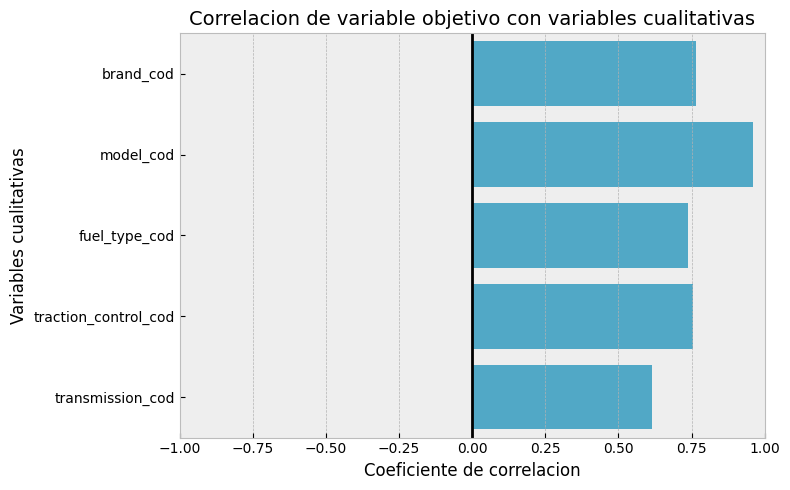

In [5]:
#COEFICIENTE DE CONTINGENCIA PARA VARIABLES CUALITATIVAS VS USD_PRICE
vars = ['brand_cod', 'model_cod', 'fuel_type_cod', 'traction_control_cod', 'transmission_cod']
Correlations(df, 'usd_price', vars, 'cualitativas').plot_contingency_coef()

### Graficos de exploracion

#### Analisis univariado

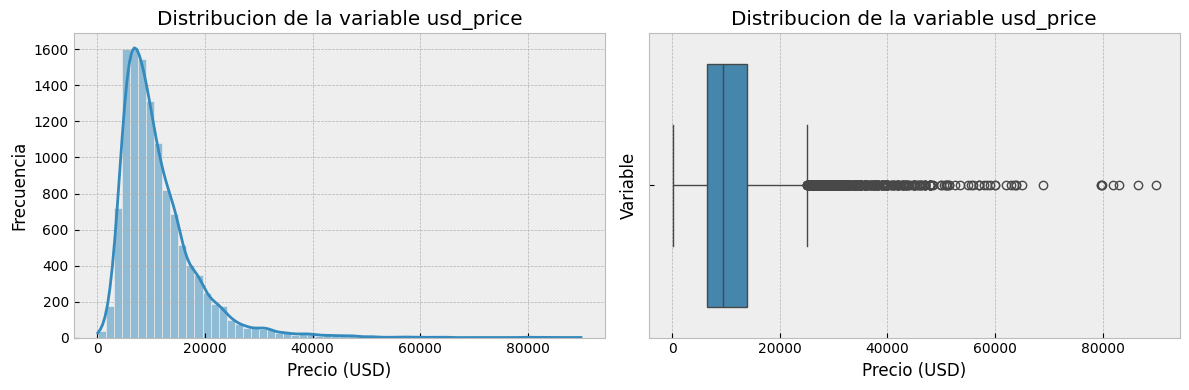

In [12]:
#DISTRIBUCION DE LA VARIABLE USD_PRICE
mpl.style.use('bmh')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.histplot(df.usd_price, kde=True, bins=60, ax=ax[0])
ax[0].set_title('Distribucion de la variable usd_price')
ax[0].set_xlabel('Precio (USD)')
ax[0].set_ylabel('Frecuencia')
#ax[0].grid(True)

sns.boxplot(df.usd_price, orient='h' ,ax=ax[1])
ax[1].set_title('Distribucion de la variable usd_price')
ax[1].set_xlabel('Precio (USD)')
ax[1].set_ylabel('Variable')
#ax[1].grid(True)

plt.tight_layout()
plt.show()
mpl.style.use('default')

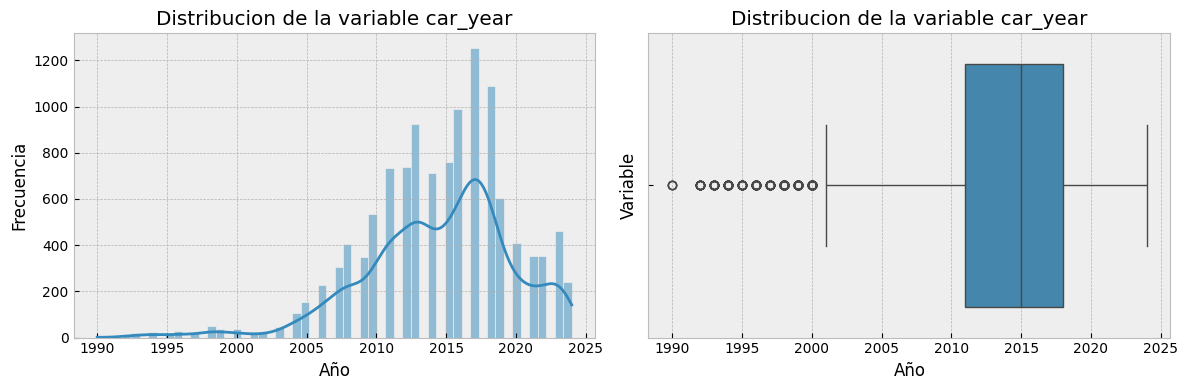

In [13]:
#DISTRIBUCION DE LA VARIABLE CAR_YEAR
mpl.style.use('bmh')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.histplot(df.car_year, kde=True, ax=ax[0])
ax[0].set_title('Distribucion de la variable car_year')
ax[0].set_xlabel('Año')
ax[0].set_ylabel('Frecuencia')

sns.boxplot(df.car_year, orient='h' ,ax=ax[1])
ax[1].set_title('Distribucion de la variable car_year')
ax[1].set_xlabel('Año')
ax[1].set_ylabel('Variable')
plt.tight_layout()
plt.show()
mpl.style.use('default')

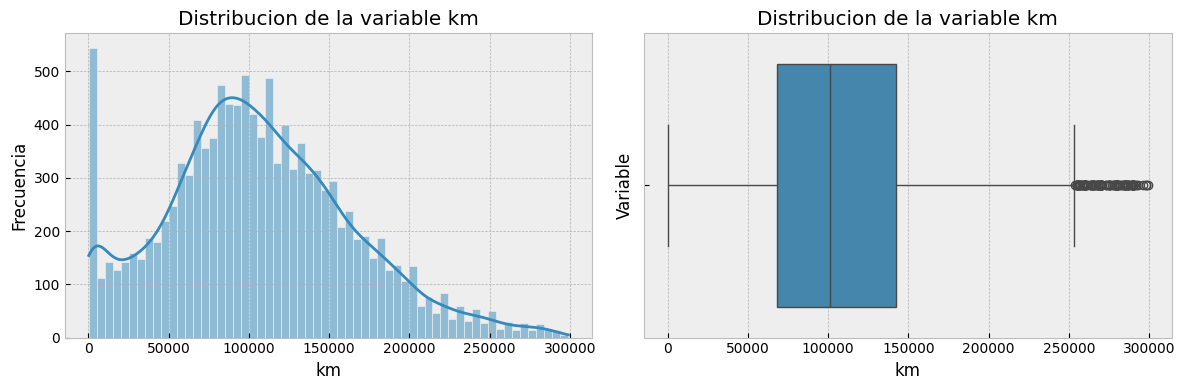

In [14]:
#DISTRIBUCION DE LA VARIABLE KM
mpl.style.use('bmh')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.histplot(df.km, kde=True, bins=60, ax=ax[0])
ax[0].set_title('Distribucion de la variable km')
ax[0].set_xlabel('km')
ax[0].set_ylabel('Frecuencia')

sns.boxplot(df.km, orient='h' ,ax=ax[1])
ax[1].set_title('Distribucion de la variable km')
ax[1].set_xlabel('km')
ax[1].set_ylabel('Variable')
plt.tight_layout()
plt.show()
mpl.style.use('default')

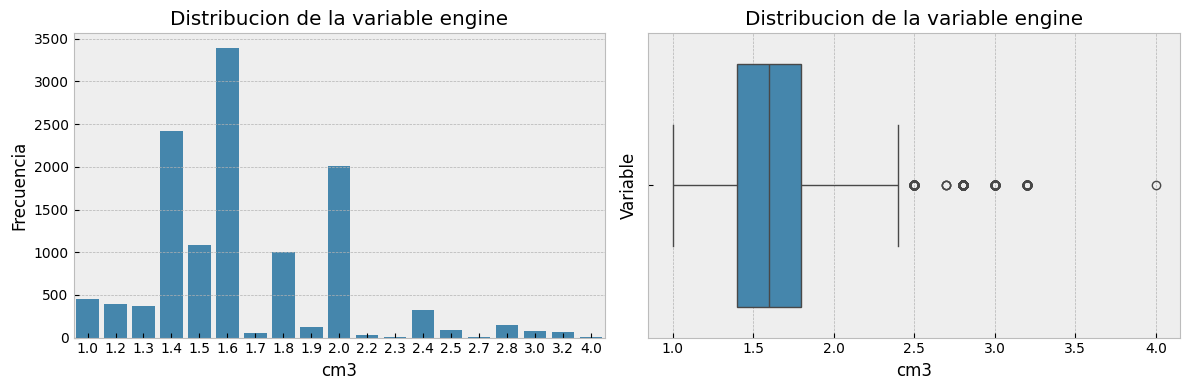

In [15]:
#DISTRIBUCION DE LA VARIABLE ENGINE
mpl.style.use('bmh')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.countplot(x=df.engine.sort_values().astype(str), ax=ax[0])
ax[0].set_title('Distribucion de la variable engine')
ax[0].set_xlabel('cm3')
ax[0].set_ylabel('Frecuencia')

sns.boxplot(df.engine, orient='h' ,ax=ax[1])
ax[1].set_title('Distribucion de la variable engine')
ax[1].set_xlabel('cm3')
ax[1].set_ylabel('Variable')
plt.tight_layout()
plt.show()
mpl.style.use('default')


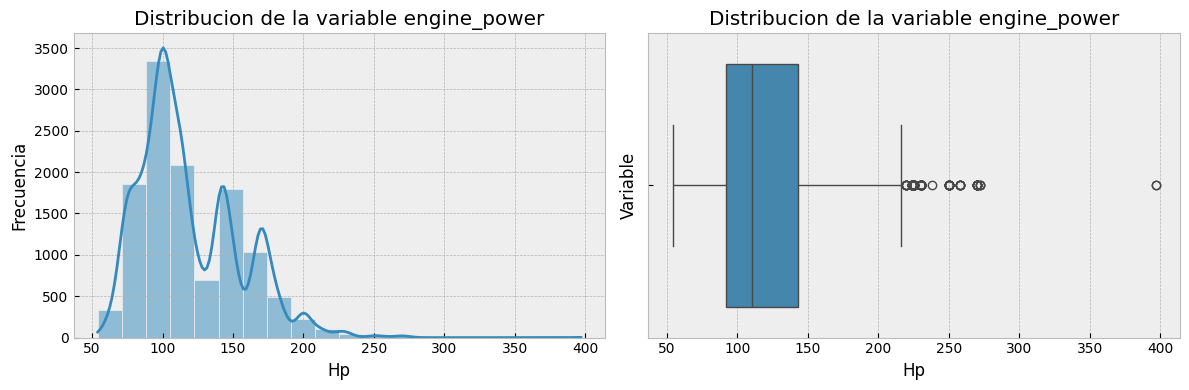

In [16]:
#DISTRIBUCION DE LA VARIABLE ENGINE_POWER
mpl.style.use('bmh')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,4))
sns.histplot(df.engine_power, kde=True, bins=20, ax=ax[0])
ax[0].set_title('Distribucion de la variable engine_power')
ax[0].set_xlabel('Hp')
ax[0].set_ylabel('Frecuencia')

sns.boxplot(df.engine_power, orient='h' ,ax=ax[1])
ax[1].set_title('Distribucion de la variable engine_power')
ax[1].set_xlabel('Hp')
ax[1].set_ylabel('Variable')
plt.tight_layout()
plt.show()
mpl.style.use('default')

#### Analisis bivariado

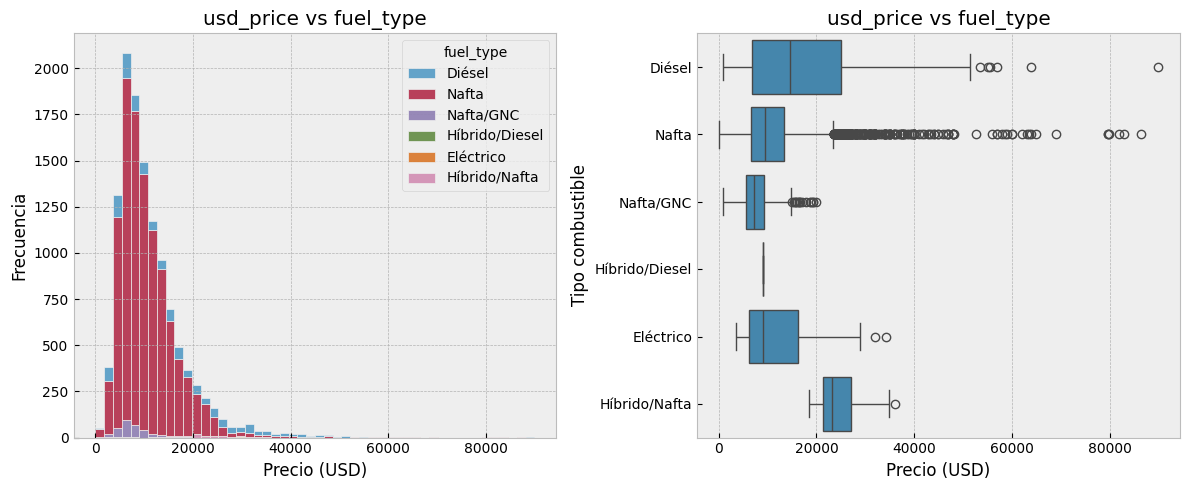

In [17]:
#USD_PRICE VS FUEL_TYPE
mpl.style.use('bmh')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(x=df.usd_price, hue=df.fuel_type, multiple='stack', bins=50, ax=ax[0])
ax[0].set_title('usd_price vs fuel_type')
ax[0].set_xlabel('Precio (USD)')
ax[0].set_ylabel('Frecuencia')

sns.boxplot(y=df.fuel_type, x=df.usd_price, ax=ax[1])
ax[1].set_title('usd_price vs fuel_type')
ax[1].set_xlabel('Precio (USD)')
ax[1].set_ylabel('Tipo combustible')

plt.tight_layout()
plt.show()
mpl.style.use('default')

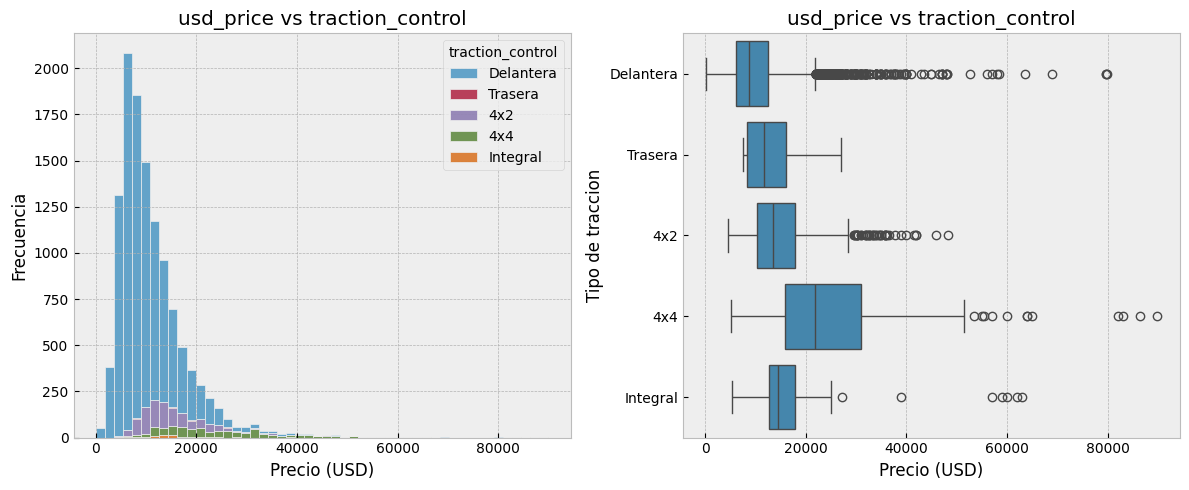

In [18]:
#USD_PRICE VS TRACCION_CONTROL
mpl.style.use('bmh')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(x=df.usd_price, hue=df.traction_control, multiple='stack', bins=50, ax=ax[0])
ax[0].set_title('usd_price vs traction_control')
ax[0].set_xlabel('Precio (USD)')
ax[0].set_ylabel('Frecuencia')

sns.boxplot(y=df.traction_control, x=df.usd_price, ax=ax[1])
ax[1].set_title('usd_price vs traction_control')
ax[1].set_xlabel('Precio (USD)')
ax[1].set_ylabel('Tipo de traccion')

plt.tight_layout()
plt.show()
mpl.style.use('default')

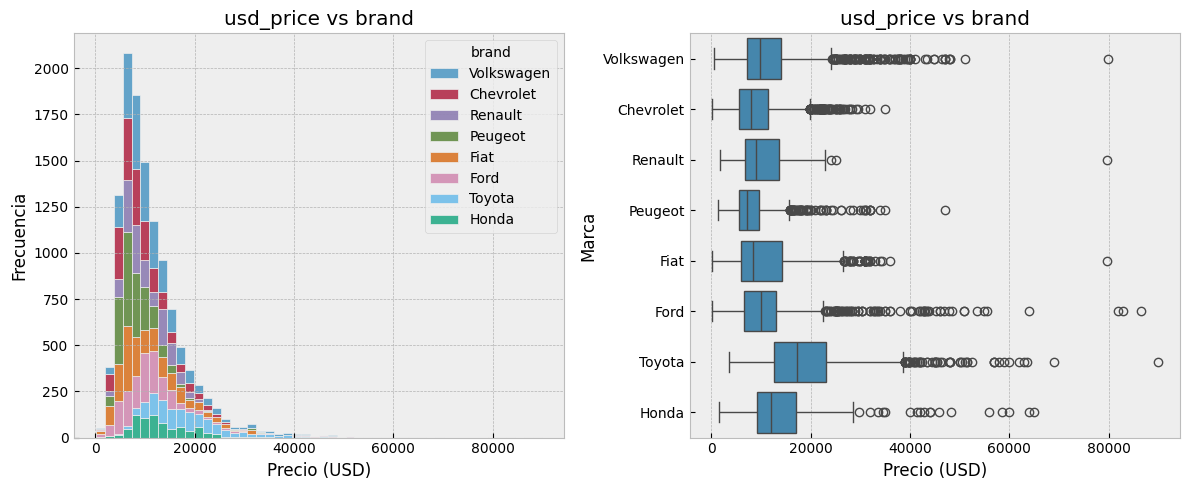

In [19]:
#USD_PRICE VS BRAND
mpl.style.use('bmh')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(x=df.usd_price, hue=df.brand, multiple='stack', bins=50, ax=ax[0])
ax[0].set_title('usd_price vs brand')
ax[0].set_xlabel('Precio (USD)')
ax[0].set_ylabel('Frecuencia')

sns.boxplot(x=df.usd_price, y=df.brand, ax=ax[1])
ax[1].set_title('usd_price vs brand')
ax[1].set_xlabel('Precio (USD)')
ax[1].set_ylabel('Marca')

plt.tight_layout()
plt.show()
mpl.style.use('default')

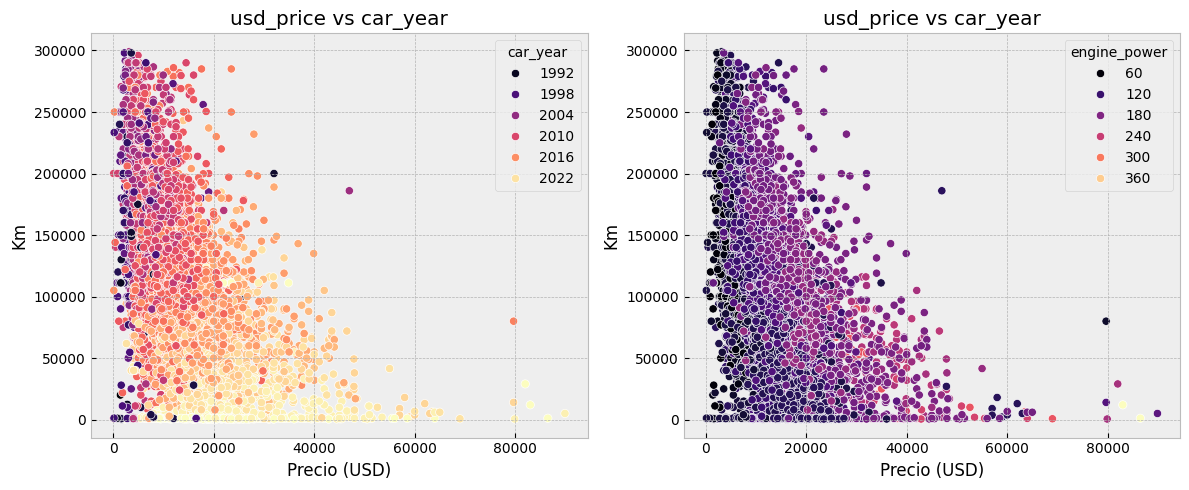

In [75]:
#USD_PRICE VS CAR_YEAR
mpl.style.use('bmh')
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.scatterplot(x=df.usd_price, y=df.km, hue=df.car_year, palette='magma', ax=ax[0])
ax[0].set_title('usd_price vs car_year')
ax[0].set_xlabel('Precio (USD)')
ax[0].set_ylabel('Km')

sns.scatterplot(x=df.usd_price, y=df.km, hue=df.engine_power, palette='magma', ax=ax[1])
ax[1].set_title('usd_price vs car_year')
ax[1].set_xlabel('Precio (USD)')
ax[1].set_ylabel('Km')

plt.tight_layout()
plt.show()
mpl.style.use('default')

#### Analisis multivariado

In [62]:
#USD_PRICE VS CAR_YEAR VS KM VS ENGINE_POWER
fig = px.scatter_3d(df, x='car_year', y='km', z='usd_price', color='engine_power')

fig.update_layout(title='Precio pormedio VS Dias entre reserva y arrivo VS Peticiones especiales',
                  xaxis_title='Mes',
                  yaxis_title='Conteo',
                  showlegend=True,
                  scene=dict(
                      xaxis=dict(title='Año'),
                      yaxis=dict(title='Km'),
                      zaxis=dict(title='Precio (USD)')
                  ),
                  coloraxis_colorbar=dict(
                  title='Hp'
                  ),
                  width=850,
                  height=750)

fig.show()

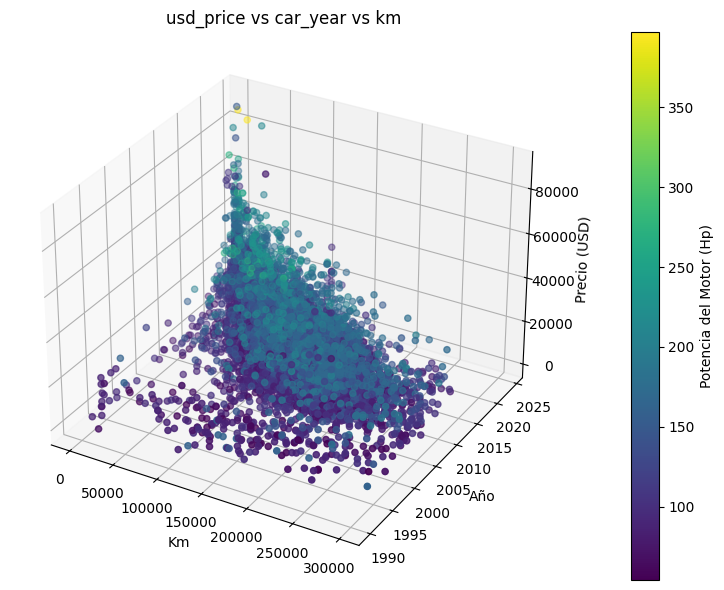

In [78]:
#USD_PRICE VS CAR_YEAR VS KM VS ENGINE_POWER
fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(15,6))
graph =ax.scatter(df.km, df.car_year, df.usd_price, c=df.engine_power)
ax.set(xlabel='Km',
       ylabel='Año',
       zlabel='Precio (USD)')
cbar = plt.colorbar(graph, ax=ax)
cbar.set_label('Potencia del Motor (Hp)')
plt.title('usd_price vs car_year vs km')
plt.tight_layout()
plt.show()